In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.interpolate import interp1d
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 

In [27]:
models = ['ref','1MeV','100MeV']

reio = 'wReio'

cosmo={}
for M in models:
    cosmo[M] = Class()
    cosmo[M].set({'gauge':'newtonian',
                  'output':'tCl, lCl',
                  'omega_cdm':0.12038,
                  #'z_reio':11.357,
                  #'reionization_z_start_max':750,
                  #'z_reiomod_start':300,
                  #'recfast_Nz0':80000,
                  #'recfast_z_initial':1e7,
                  'recombination':'recfast',
                  #'recfast_H_frac':3e-4,
                  #'reio_parametrization':'reio_none',
                  #'100*theta_s':1.042143,
                  #'100*theta_s':1.02,
                  'background_verbose':5,
                  'input_verbose':5,
                  'h':0.67556,
                  'lensing':'yes',
                  'tight_coupling_trigger_tau_c_over_tau_h':0.008,
                  'tight_coupling_trigger_tau_c_over_tau_k':0.001,
                 })
    if M == '1MeV':
        cosmo[M].set({'a_bidm':5e-5,
                      'f_bidm':0.99,
                      'A_bidm':1.7e-41,
                      'm_bidm':1,
                      'n_bidm':-4,
                      'bidm_type':'powerlaw'})
    if M == '100MeV':
        cosmo[M].set({'a_bidm':5e-3,
                      'f_bidm':0.99,
                      'A_bidm':1.9e-41,
                      'm_bidm':100.,
                      'n_bidm':-4,
                      'bidm_type':'powerlaw'})
    print([M])
    cosmo[M].compute()


['ref']
['1MeV']
['100MeV']


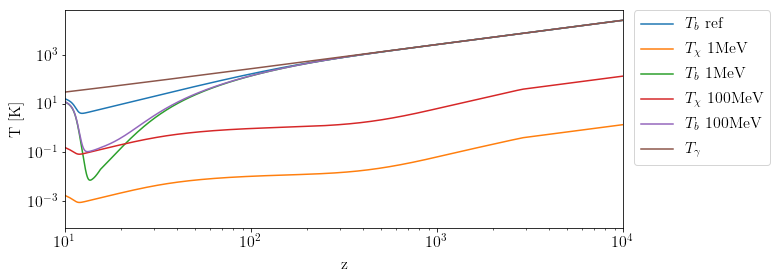

In [33]:
fig = plt.figure(1, figsize = (10,4))
ax = fig.add_subplot(111)
for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    if M != 'ref':
        ax.loglog(Th['z'],Th['Tbidm [K]'],label='$T_\chi$ '+M)
    ax.loglog(Th['z'],Th['Tb [K]'],label = '$T_b$ '+M)
ax.loglog(Th['z'],2.73*(Th['z']+1), label = '$T_\gamma$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.,fontsize=16)
ax.set_xlim(10,1e4)
ax.set_xlabel('z',fontsize=16)
ax.set_ylabel('T [K]',fontsize=16)
fig.savefig('Plots/T'+ reio + '.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')

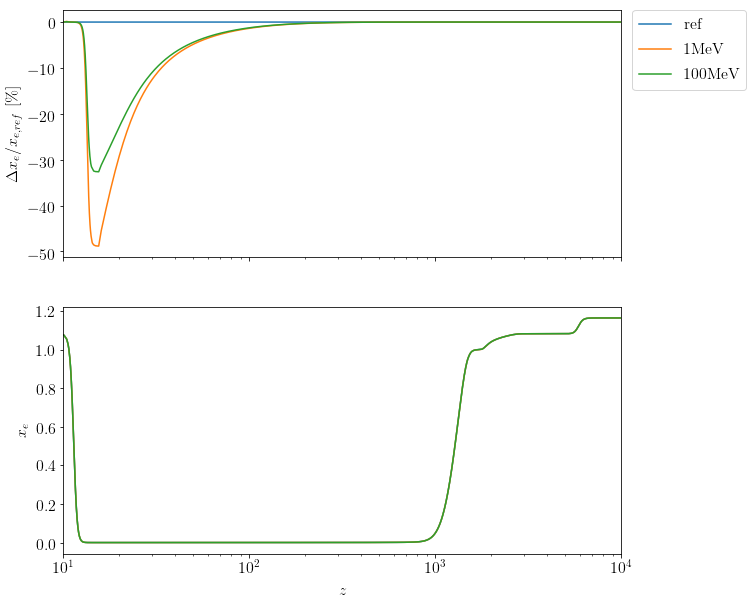

In [34]:
fig, axes = plt.subplots(2,1,figsize=(10,10),sharex=True)
Th = cosmo['ref'].get_thermodynamics()
x_eref = interp1d(Th['z'],Th['x_e'])

for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    axes[0].semilogx(Th['z'],100*((Th['x_e']-x_eref(Th['z']))/x_eref(Th['z'])),label=M)
    axes[1].semilogx(Th['z'],Th['x_e'],label='x_e '+M)
axes[0].set_xlim(10,1e4)
axes[0].set_ylabel('$\Delta x_e / {x_e}_{,ref}$ [\%]',fontsize=16)
axes[1].set_ylabel('$x_e$',fontsize=16)
axes[1].set_xlabel('$z$',fontsize=16)
handles, labels = axes[0].get_legend_handles_labels()
lgd = axes[0].legend(handles, labels, bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.,fontsize=16)

fig.savefig('Plots/xe' + reio + '.pdf',bbox_extra_artists=(lgd,), bbox_inches='tight')

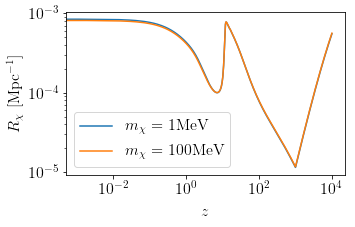

In [35]:
fig = plt.figure(1,figsize=(5,3))
ax = fig.add_subplot(111)
for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    if M != 'ref':
        #H = np.array([cosmo[M].Hubble(zz) for zz in Th['z']])
        ax.loglog(Th['z'],Th['Rbidm'],label='$m_\chi = $ '+M)
ax.legend(fontsize=16)
ax.set_xlabel('$z$',fontsize=16)
ax.set_ylabel('$R_\chi$ [Mpc${}^{-1}$]',fontsize=16)

fig.savefig('Plots/Rbidm' + reio + '.pdf',bbox_inches='tight')

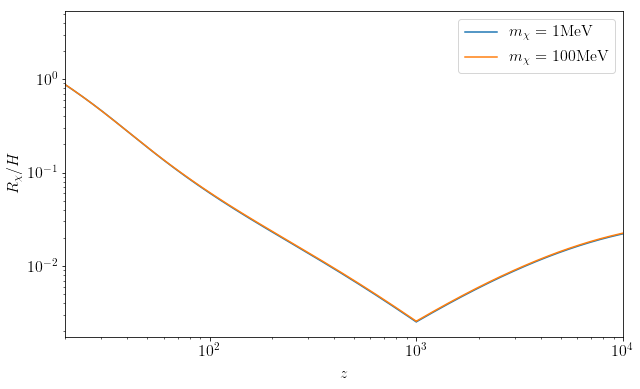

In [36]:
fig = plt.figure(1,figsize=(10,6))
ax = fig.add_subplot(111)
for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    if M != 'ref':
        H = np.array([cosmo[M].Hubble(zz) for zz in Th['z']])
        ax.loglog(Th['z'],(Th['z']+1)*Th['Rbidm']/H,label='$m_\chi = $ '+M)
ax.legend(fontsize=16)
ax.set_xlabel('$z$',fontsize=16)
ax.set_ylabel('$R_\chi / H$',fontsize=16)
ax.set_xlim([20,1e4])

fig.savefig('Plots/RoverH' + reio + '.pdf',bbox_inches='tight')

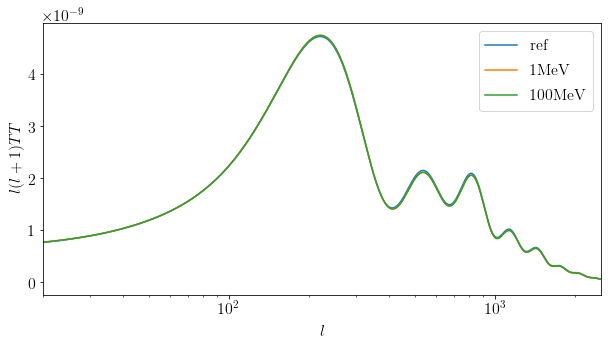

In [37]:
fig = plt.figure(1, figsize = (10,5))
ax = fig.add_subplot(111)
for M in models:
    cl = cosmo[M].lensed_cl(2500)
    l = cl['ell']
    TT = cl['tt']
    ax.semilogx(l,(l*(l+1))*TT, label=M)
ax.set_xlim(20,2.5e3)
ax.set_xlabel('$l$',fontsize=16)
ax.set_ylabel('$l(l+1)TT$',fontsize=16)
ax.legend(fontsize=16)
fig.savefig('Plots/TT' + reio + '.pdf')

In [18]:
#fig = plt.figure(1, figsize = (10,5))
#ax = fig.add_subplot(111)
#for M in models:
#    cl = cosmo[M].lensed_cl(2500)
#    l = cl['ell']
#    if M != 'ref':
#        l=0.98*l
#    TT = cl['tt']
#    ax.semilogx(l,(l*(l+1))*TT, label=M)
#ax.set_xlim(20,2.5e3)
#ax.set_xlabel('$l$',fontsize=16)
#ax.set_ylabel('$l(l+1)TT$',fontsize=16)
#ax.legend(fontsize=16)
#fig.savefig('Plots/TThack' + reio + '.pdf')

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


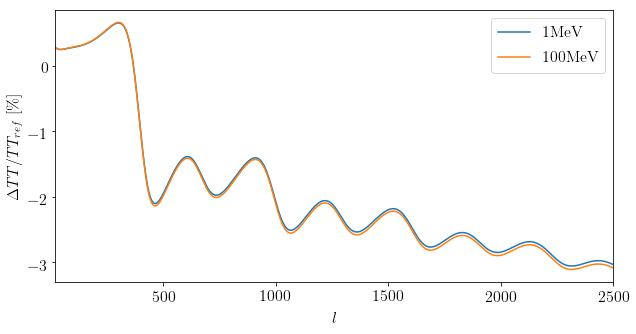

In [38]:
fig = plt.figure(1, figsize = (10,5))
ax = fig.add_subplot(111)
clref = cosmo['ref'].lensed_cl(2500)
TTref = clref['tt']
for M in models:
    if M != 'ref':
        cl = cosmo[M].lensed_cl(2500)
        l = cl['ell']
        TT = cl['tt']
        ax.plot(l,100*(TT-TTref)/TTref, label=M)
ax.set_xlim(20,2.5e3)
ax.set_xlabel('$l$',fontsize=16)
ax.set_ylabel('$\Delta TT / TT_{ref}$ [\%]',fontsize=16)
ax.legend(fontsize=16)
fig.savefig('Plots/deltaTT' + reio + '.pdf')

In [11]:
#fig = plt.figure(1, figsize = (10,5))
#ax = fig.add_subplot(111)
#clref = cosmo['ref'].lensed_cl(2500)
#TTref = clref['tt']
#for M in models:
#    if M != 'ref':
#        cl = cosmo[M].lensed_cl(2500)
#        l = cl['ell']
#        lhack = 0.98*l
#        TT = cl['tt']
#        TTi = interp1d(lhack,TT)
#        ax.plot(l[0:2450],100*(TTi(l[0:2450])-TTref[0:2450])/TTref[0:2450], label=M)
#ax.set_xlim(20,2.5e3)
#ax.set_xlabel('$l$',fontsize=16)
#ax.set_ylabel('$\Delta TT / TT_{ref}$ [\%]',fontsize=16)
#ax.legend(fontsize=16)
#fig.savefig('Plots/deltaTThack' + reio + '.pdf')